In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from matplotlib import rcParams
%matplotlib inline

In [2]:
rcParams['figure.figsize'] = 10,10
rcParams['axes.linewidth'] = 4.0
rcParams['savefig.dpi'] = 500
rcParams['pdf.fonttype'] = 42
rcParams['ps.fonttype'] = 42
rcParams['agg.path.chunksize'] = 10000

# NET Distances

In [3]:
def calcStats (data):
    avg=np.average(data)
    std=np.std(data, dtype=np.float64)
    result = avg, u"\u00B1", std
    print('The average Dist is:', result)
    #return result
    minVal = data[data > .01].min(axis=0)
    maxVal = data.max()
    print("Range of Dist is ", minVal, "-", maxVal)

def HBondCutoff (data, cutoffTemp):    
    allLen = len(data)
    cutoff=(cutoffTemp + .1)
    t = list(filter((cutoff).__ge__, data))
    lenVar = len(t)
    percent = (lenVar/allLen * 100)
    print("Percentage for a", cutoffTemp ,"\u212B cuttoff is: ", percent,"%")

In [4]:
filelist=['/mnt/u1/NET/tat-net-out-open/net-tat-lipid/ptraj/dist.y31-k563.out',
          '/mnt/u1/NET/tat-net-out-open/net-tat-lipid/ptraj/dist.k35N-p562O.out',
          '/mnt/u1/NET/tat-net-out-open/net-tat-lipid/ptraj/dist.y414-m545.out',
          '/mnt/u1/NET/tat-net-out-open/net-tat-lipid/ptraj/dist.s150-q604.out',
          '/mnt/u1/NET/tat-net-out-open/net-tat-lipid/ptraj/dist.t491O-k585N.out']

In [5]:
dist=[]
for file in filelist:
    data=np.loadtxt(file,comments='#',usecols=1)
    dist.append(data)

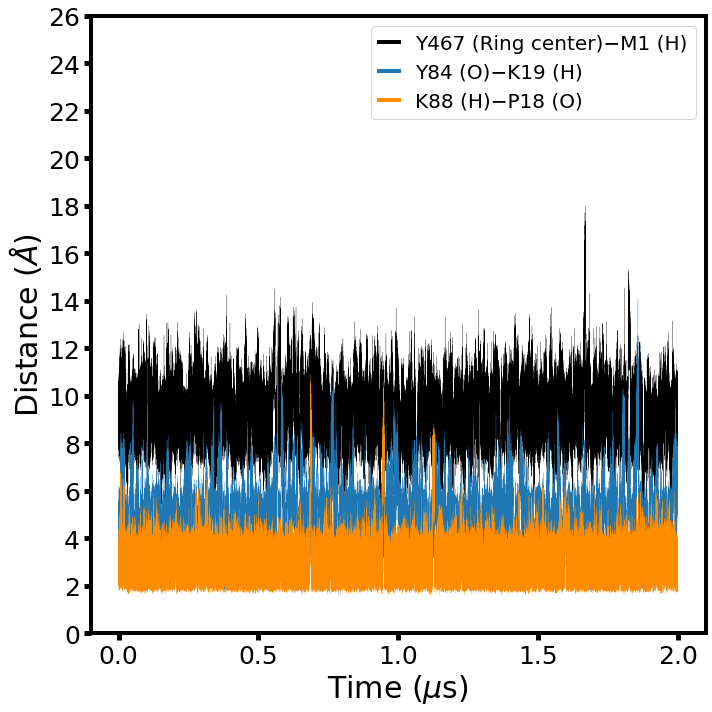

In [6]:
x = np.arange(len(dist[0]))/100000

plt.plot(x,dist[2], color='0', linewidth =.2, label='Y467 (Ring center)\N{MINUS SIGN}M1 (H)')
plt.plot(x,dist[0], color='C0', linewidth =.2, label='Y84 (O)\N{MINUS SIGN}K19 (H)')
plt.plot(x,dist[1], color='darkorange', linewidth =.2, label='K88 (H)\N{MINUS SIGN}P18 (O)')

leg = plt.legend(fontsize=20,handlelength=1,loc="best")

# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(4.0)

plt.ylabel("Distance ($\AA$)", fontsize=30)
plt.yticks((np.arange(0, 28, step=2)), fontsize=30)
plt.xlabel("Time ($\mu$s)", fontsize=30)
plt.xticks(fontsize=28)
plt.tick_params(axis='both',labelsize='25', length=7, width=5)
plt.tight_layout()
#plt.savefig("../figs/net-dist3.png", transparent=True)

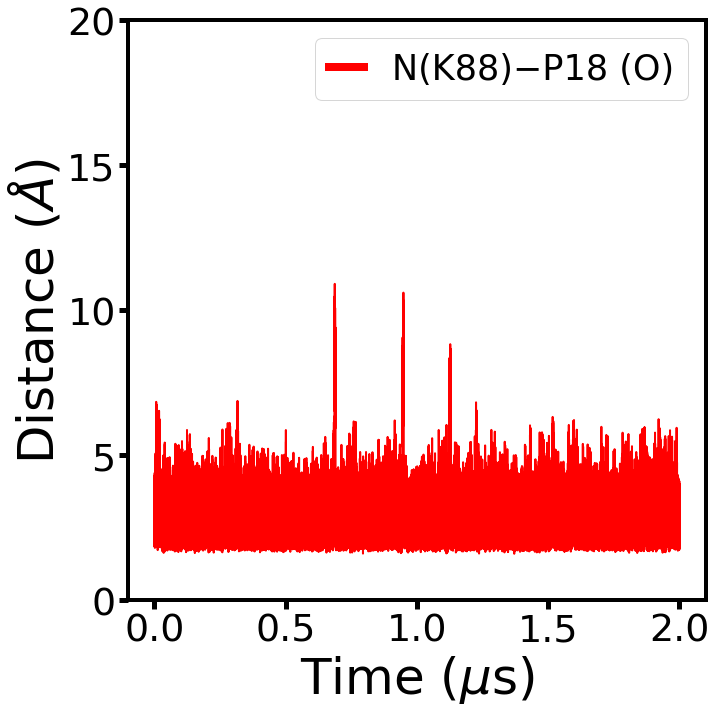

In [7]:
x = np.arange(len(dist[1]))/100000

plt.plot(x,dist[1], color='red', linewidth = 2, label='N(K88)\N{MINUS SIGN}P18 (O)')

leg = plt.legend(fontsize=35,handlelength=1,loc="best")

# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(8.0)

plt.ylabel("Distance ($\AA$)", fontsize=50)
plt.yticks((np.arange(0, 25, step=5)), fontsize=35)
plt.xlabel("Time ($\mu$s)", fontsize=50)
plt.xticks(fontsize=35)
plt.tick_params(axis='both', labelsize='38', length=9, width=5)
plt.tight_layout()
plt.savefig("../../figs/dist1.png", transparent=True)

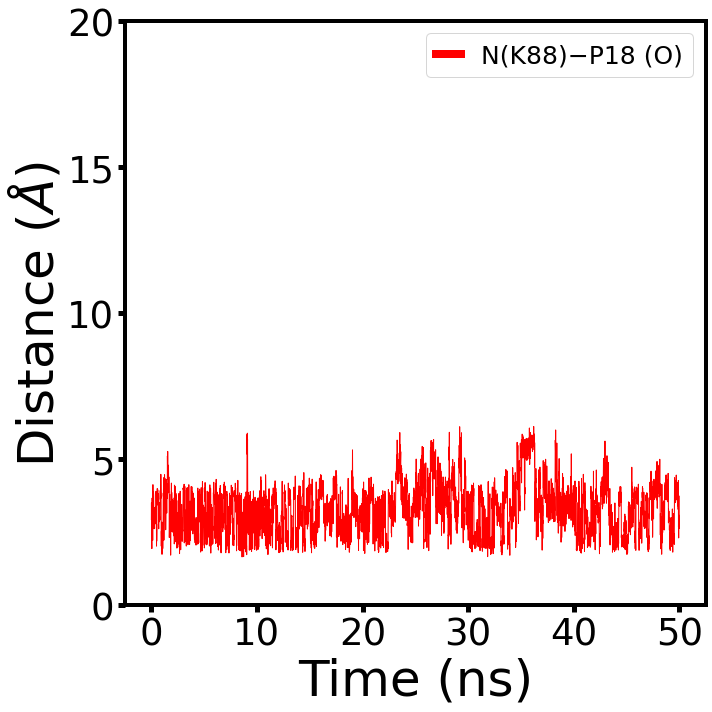

In [8]:
x = np.arange(len(dist[1][25000:30000]))/100

plt.plot(x,dist[1][25000:30000], color='red', linewidth = 1, label='N(K88)\N{MINUS SIGN}P18 (O)')

leg = plt.legend(fontsize=25,handlelength=1,loc="best")

# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(8.0)

plt.ylabel("Distance ($\AA$)", fontsize=50)
plt.yticks((np.arange(0, 25, step=5)), fontsize=35)
plt.xlabel("Time (ns)", fontsize=50)
plt.xticks((np.arange(0, 55, step=10)),fontsize=35)
plt.tick_params(axis='both', labelsize='37', length=7, width=5)
plt.tight_layout()
plt.savefig("../../figs/distance1.png", transparent=True)

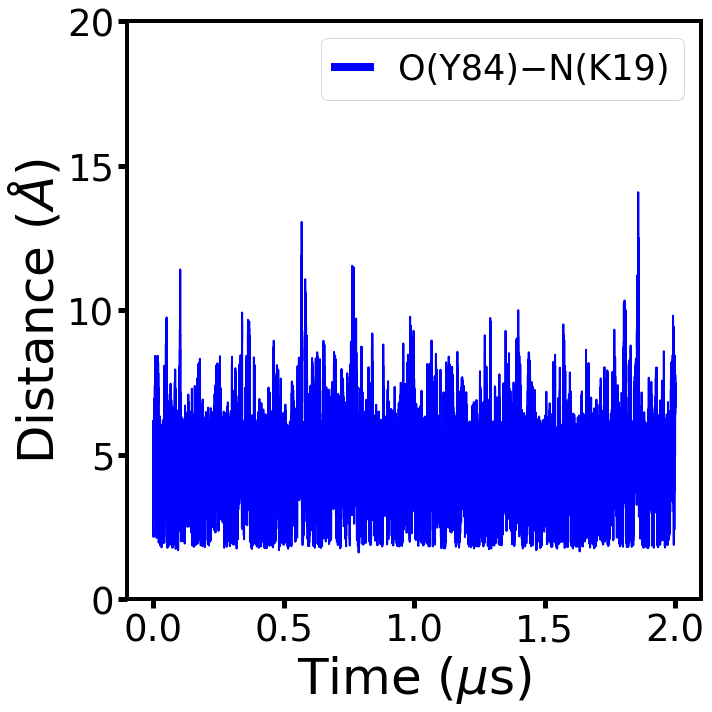

In [9]:
x = np.arange(len(dist[1]))/100000

plt.plot(x,dist[0], color='blue', linewidth = 2, label='O(Y84)\N{MINUS SIGN}N(K19)')

leg = plt.legend(fontsize=35,handlelength=1,loc="best")

# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(8.0)

plt.ylabel("Distance ($\AA$)", fontsize=50)
plt.yticks((np.arange(0, 25, step=5)), fontsize=35)
plt.xlabel("Time ($\mu$s)", fontsize=50)
plt.xticks(fontsize=35)
plt.tick_params(axis='both', labelsize='37', length=9, width=5)
plt.tight_layout()
plt.savefig("../../figs/dist2.png", transparent=True)

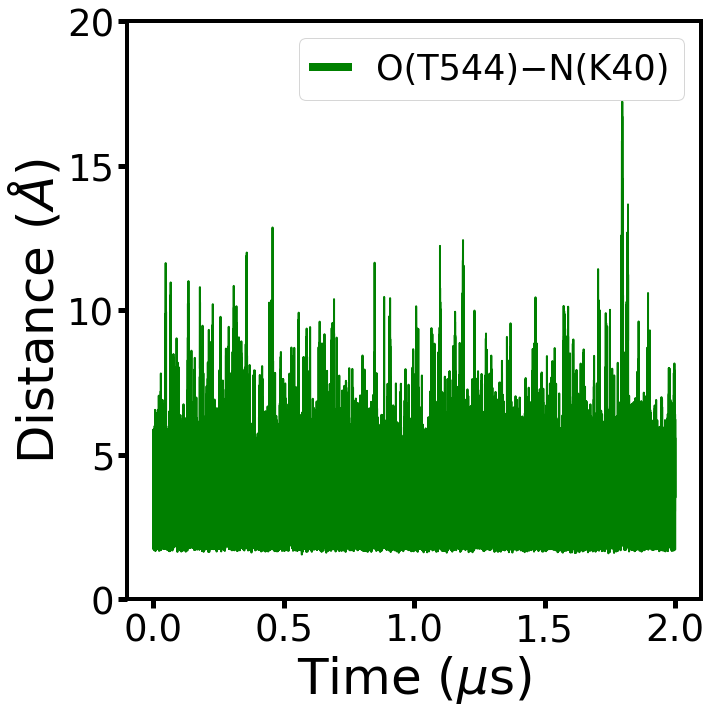

In [10]:
plt.plot(x,dist[4], color='green', linewidth =2, label='O(T544)\N{MINUS SIGN}N(K40)')

leg = plt.legend(fontsize=35,handlelength=1,loc="best")

# set the linewidth of each legend object
for legobj in leg.legendHandles:
    legobj.set_linewidth(8.0)

plt.ylabel("Distance ($\AA$)", fontsize=50)
plt.yticks((np.arange(0, 25, step=5)), fontsize=35)
plt.xlabel("Time ($\mu$s)", fontsize=50)
plt.xticks(fontsize=35)
plt.tick_params(axis='both', labelsize='37', length=9, width=5)
plt.tight_layout()
plt.savefig("../../figs/dist3.png", transparent=True)

In [11]:
print("Stats for Y84 (O) - K19 (H)")
calcStats(dist[0])
HBondCutoff(dist[0], 2.0)
HBondCutoff(dist[0], 2.5)
HBondCutoff(dist[0], 3.0)
HBondCutoff(dist[0], 3.5)
HBondCutoff(dist[0], 5.0)
HBondCutoff(dist[0], 6.0)
HBondCutoff(dist[0], 7.0)
HBondCutoff(dist[0], 8.0)
HBondCutoff(dist[0], 9.0)

Stats for Y84 (O) - K19 (H)
The average Dist is: (4.845016425499999, '±', 1.245383028731865)
Range of Dist is  1.6177 - 14.0774
Percentage for a 2.0 Å cuttoff is:  0.9455 %
Percentage for a 2.5 Å cuttoff is:  3.5195 %
Percentage for a 3.0 Å cuttoff is:  7.290000000000001 %
Percentage for a 3.5 Å cuttoff is:  14.332 %
Percentage for a 5.0 Å cuttoff is:  60.8045 %
Percentage for a 6.0 Å cuttoff is:  86.4685 %
Percentage for a 7.0 Å cuttoff is:  95.54899999999999 %
Percentage for a 8.0 Å cuttoff is:  98.6505 %
Percentage for a 9.0 Å cuttoff is:  99.5425 %


In [12]:
print("Stats for K88 (H)- P18 (O)")
calcStats(dist[1])
HBondCutoff(dist[1], 2.0)
HBondCutoff(dist[1], 2.5)
HBondCutoff(dist[1], 3.0)
HBondCutoff(dist[1], 3.5)
HBondCutoff(dist[1], 3.6)
HBondCutoff(dist[1], 3.7)
HBondCutoff(dist[1], 3.8)
HBondCutoff(dist[1], 3.9)
HBondCutoff(dist[1], 4.0)
HBondCutoff(dist[1], 4.5)
HBondCutoff(dist[1], 5.0)
HBondCutoff(dist[1], 6.0)

Stats for K88 (H)- P18 (O)
The average Dist is: (3.1590213659999997, '±', 0.8548224456446462)
Range of Dist is  1.6041 - 10.914
Percentage for a 2.0 Å cuttoff is:  9.198 %
Percentage for a 2.5 Å cuttoff is:  27.9465 %
Percentage for a 3.0 Å cuttoff is:  50.044999999999995 %
Percentage for a 3.5 Å cuttoff is:  69.7815 %
Percentage for a 3.6 Å cuttoff is:  75.324 %
Percentage for a 3.7 Å cuttoff is:  80.617 %
Percentage for a 3.8 Å cuttoff is:  85.03699999999999 %
Percentage for a 3.9 Å cuttoff is:  88.3905 %
Percentage for a 4.0 Å cuttoff is:  90.8925 %
Percentage for a 4.5 Å cuttoff is:  96.391 %
Percentage for a 5.0 Å cuttoff is:  98.138 %
Percentage for a 6.0 Å cuttoff is:  99.2145 %


In [13]:
print("Stats for Y467 (Ring center) - M1 (H)")
calcStats(dist[2])
HBondCutoff(dist[2], 2.0)
HBondCutoff(dist[2], 2.5)
HBondCutoff(dist[2], 3.0)

Stats for Y467 (Ring center) - M1 (H)
The average Dist is: (9.2394504955, '±', 1.2623085446997317)
Range of Dist is  2.7189 - 17.9677
Percentage for a 2.0 Å cuttoff is:  0.0 %
Percentage for a 2.5 Å cuttoff is:  0.0 %
Percentage for a 3.0 Å cuttoff is:  0.019 %


In [14]:
print("Stats for T544(O) - K40(H)")
calcStats(dist[4])
HBondCutoff(dist[4], 2.0)
HBondCutoff(dist[4], 2.5)
HBondCutoff(dist[4], 3.0)
HBondCutoff(dist[4], 3.5)
HBondCutoff(dist[4], 5.0)
HBondCutoff(dist[4], 6.0)
HBondCutoff(dist[4], 7.0)
HBondCutoff(dist[4], 8.0)
HBondCutoff(dist[4], 9.0)

Stats for T544(O) - K40(H)
The average Dist is: (3.888630732499999, '±', 1.3941992546954556)
Range of Dist is  1.5478 - 17.2067
Percentage for a 2.0 Å cuttoff is:  6.9735000000000005 %
Percentage for a 2.5 Å cuttoff is:  15.928999999999998 %
Percentage for a 3.0 Å cuttoff is:  28.628999999999998 %
Percentage for a 3.5 Å cuttoff is:  47.6225 %
Percentage for a 5.0 Å cuttoff is:  84.0495 %
Percentage for a 6.0 Å cuttoff is:  93.5515 %
Percentage for a 7.0 Å cuttoff is:  97.077 %
Percentage for a 8.0 Å cuttoff is:  98.6405 %
Percentage for a 9.0 Å cuttoff is:  99.375 %


In [15]:
print("Stats for S203(O) - Q59(H)")
calcStats(dist[3])
HBondCutoff(dist[3], 2.0)
HBondCutoff(dist[3], 2.5)
HBondCutoff(dist[3], 3.0)

Stats for S203(O) - Q59(H)
The average Dist is: (8.4415209775, '±', 1.6857147385343092)
Range of Dist is  4.3281 - 18.5385
Percentage for a 2.0 Å cuttoff is:  0.0 %
Percentage for a 2.5 Å cuttoff is:  0.0 %
Percentage for a 3.0 Å cuttoff is:  0.0 %


In [16]:
data=dist[0]
allLen = len(data)
cutoff=(2.5 + .1)
t = list(filter((cutoff).__ge__, data))
print(t)
#lenVar = len(t)
#percent = (lenVar/allLen * 100)
#print("Percentage for a", cutoffTemp ,"\u212B cuttoff is: ", percent,"%")

[2.309, 2.5059, 2.1532, 2.1248, 2.4493, 2.5177, 2.3529, 2.2285, 2.3853, 2.2608, 2.5315, 2.2807, 2.0748, 2.5537, 1.959, 2.256, 2.4985, 2.1021, 2.2505, 2.1858, 2.3729, 2.4403, 2.5028, 2.5892, 2.1808, 2.3317, 1.9243, 2.4037, 1.9918, 2.3737, 2.2892, 2.3419, 2.5033, 2.426, 1.9534, 2.2683, 2.4484, 2.3757, 1.9516, 2.1097, 1.8562, 2.3915, 1.9918, 2.4208, 2.0464, 2.4021, 2.54, 2.4521, 2.1135, 2.4787, 1.8675, 2.5607, 2.1255, 2.0936, 2.2163, 2.0564, 2.4411, 2.3979, 2.4601, 2.4672, 2.0602, 1.9109, 2.1514, 2.3582, 1.9531, 2.2493, 2.2019, 2.2559, 2.083, 2.4435, 2.0195, 2.2446, 1.923, 2.1779, 2.0934, 2.2439, 1.8649, 2.0448, 2.1533, 1.9135, 2.2007, 2.0312, 2.0188, 2.5187, 2.2825, 2.1195, 1.9387, 2.0551, 2.3884, 2.0202, 1.7966, 2.0417, 2.1546, 2.0185, 2.2486, 2.5741, 2.3168, 2.3112, 2.4114, 2.0034, 2.4534, 2.4607, 2.5394, 2.3327, 1.945, 2.3211, 2.3211, 2.0034, 1.8661, 2.3371, 2.4332, 2.4154, 1.9011, 2.5036, 2.0179, 2.2531, 2.1064, 2.2031, 2.5901, 2.1635, 2.5821, 2.5154, 2.1812, 1.9782, 2.4025, 2.3988, 